In [8063]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,4)
# plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


In [8064]:
## Read Log File
log_dir = 'exp_progan_128_256_train_cont101_50_50_bs1_w40final_cropcontrast_greybbox_Gmask12_noisedecoder_sppV_sppV_img128L_imgL_lambdaL80L80_LR12_CV10_pretrain1000_seed12'
try:
#     with open('../multi_stage_checkpoints_oct11/'+log_dir+'/loss_log.txt', 'r') as f:
#         log = f.read()
    with open('../checkpoints/'+log_dir+'/loss_log.txt', 'r') as f:
        log = f.read()
except:
    with open('../baseline_checkpoints/'+log_dir+'/loss_log.txt', 'r') as f:
        log = f.read()

## Create directory for saved plots    
if not os.path.exists(log_dir):
    os.makedirs(log_dir)
    
## Save Plots    
SAVE = True

## Max number of plot iterations
MAX_ITER = 1000000000

PIX2PIX = 'pix2pix' in log_dir


In [8065]:
# llog = log.split('\n')
llog = log.split('================')[-1].split('\n')
split_llog = [e.replace('(', '').replace(')', '').replace(',', '').split() for e in llog]
# llog[:3]

In [8066]:
llog[:3]
llog[7999:9000]
len(llog)
llog[-5:]

['(epoch: 200, iters: 239700, lr: 0.0000024, t_comp: 0.116, t_load: 0.019) G_image: 0.245 G_person: 0.674 G_L1: 3.277 D_image_real: 0.049 D_image_fake: 0.345 D_person_real: 0.362 D_person_fake: 0.684 acc_D_image_real: 1.000 acc_D_image_fake: 0.360 acc_D_person_real: 0.760 acc_D_person_fake: 0.810 grad_G_outer_image: 6.579 grad_G_outer_person: 10.909 grad_G_outer_L1: 3.015 grad_G_outer: 10.795 grad_G_outer_clip: 10.795 grad_G_inner_image: 0.000 grad_G_inner_person: 0.000 grad_G_inner_L1: 0.000 grad_G_inner: 0.001 grad_G_inner_clip: 0.001 grad_G_mid_image: 0.054 grad_G_mid_person: 0.118 grad_G_mid_L1: 0.071 grad_G_mid: 0.145 grad_G_mid_clip: 0.145 ',
 '(epoch: 200, iters: 239800, lr: 0.0000024, t_comp: 0.116, t_load: 0.018) G_image: 0.531 G_person: 0.934 G_L1: 1.720 D_image_real: 0.268 D_image_fake: 0.111 D_person_real: 0.737 D_person_fake: 0.473 acc_D_image_real: 0.540 acc_D_image_fake: 0.890 acc_D_person_real: 0.190 acc_D_person_fake: 1.000 grad_G_outer_image: 24.835 grad_G_outer_perso

In [8067]:
# Create list of keys from log data
keys = [k.replace(':','') for k in split_llog[1] if ':' in k]
print('logged data:')
print(keys)

# Create empty dict for log data
log_dict = {k:[] for k in keys}
log_dict['i'] = []


# Populate log dict
count = 0
for entry in split_llog:
#     print(entry)
    if entry and entry[0] == 'epoch:' and count < MAX_ITER:
        log_dict['i'].append(count)
        count += 1
        key = ''
        for e in entry:
            if e[:-1] in keys:
                key = e[:-1]
            else:
                data = float(e) if '.' in e else int(e)
                log_dict[key].append(data)


# print(log_dict)

    

logged data:
['epoch', 'iters', 'lr', 't_comp', 't_load', 'G_image', 'G_person', 'G_L1', 'D_image_real', 'D_image_fake', 'D_person_real', 'D_person_fake', 'acc_D_image_real', 'acc_D_image_fake', 'acc_D_person_real', 'acc_D_person_fake', 'grad_G_outer_image', 'grad_G_outer_person', 'grad_G_outer_L1', 'grad_G_outer', 'grad_G_outer_clip', 'grad_G_inner_image', 'grad_G_inner_person', 'grad_G_inner_L1', 'grad_G_inner', 'grad_G_inner_clip', 'grad_G_mid_image', 'grad_G_mid_person', 'grad_G_mid_L1', 'grad_G_mid', 'grad_G_mid_clip']


In [8068]:
count

1200

In [8069]:
# log_dict['iters'] = [int(x/32) for x in log_dict['iters']]
# log_dict['iters'][:5]

In [8070]:
# ## Remove duplicate data when using continue_train

# for key in log_dict.keys():
#     log_without_retrained_iters = []
#     log_orig = log_dict[key][::-1]
#     [log_without_retrained_iters.append(element) for element in log_orig if element not in log_without_retrained_iters]
    
#     log_dict[key] = log_without_retrained_iters[::-1]
     

---

## G_image loss plot

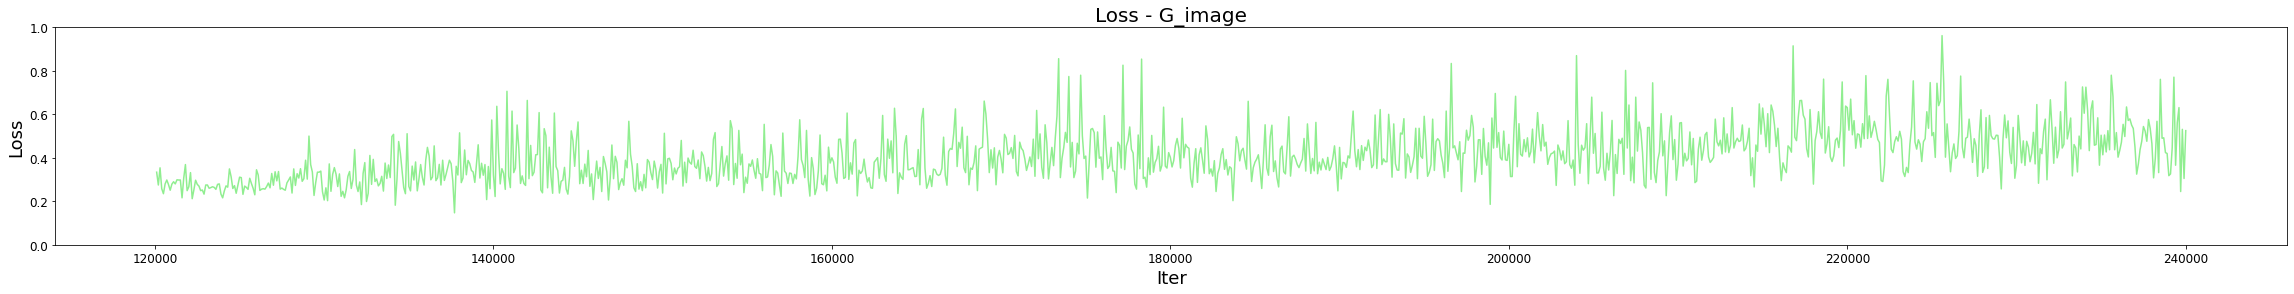

In [8071]:
# Data for plotting
x = log_dict['iters']
try:
    if PIX2PIX:
        y = log_dict['G_GAN']
    else:
        y = log_dict['G_image']
except:
    y = log_dict['G_GAN_image']
fig, ax = plt.subplots()
ax.plot(x, y, 'lightgreen')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - G_image')
plt.ylim(0, 1)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_G_image.png")
plt.show()



## D_image_fake loss plot

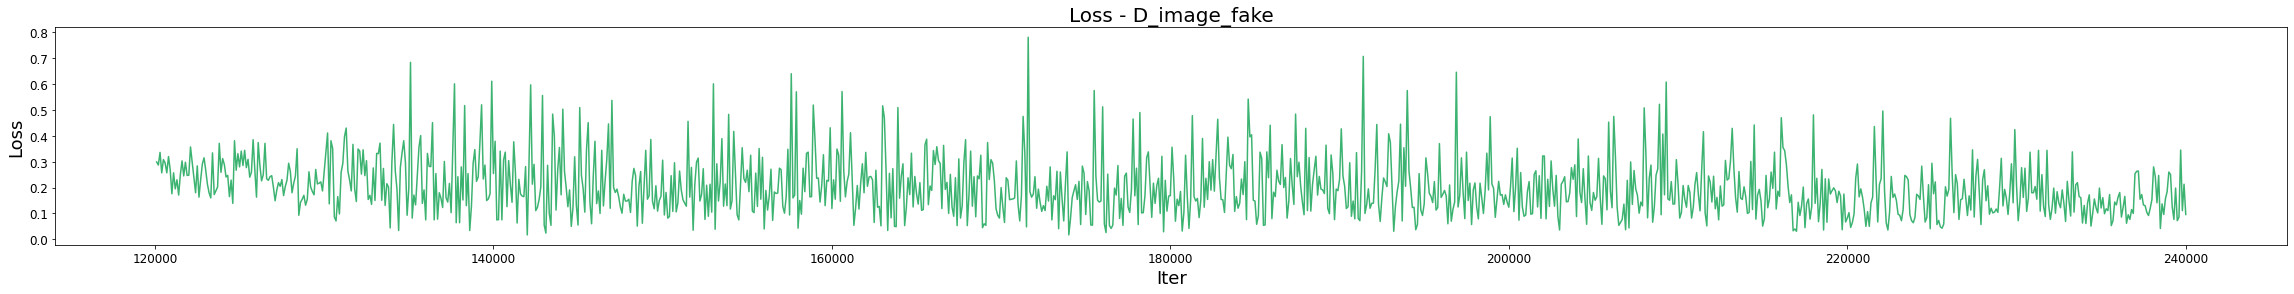

In [8072]:
# Data for plotting
x = log_dict['iters']
if PIX2PIX:
    y = log_dict['D_fake']
else:
    y = log_dict['D_image_fake']
fig, ax = plt.subplots()
ax.plot(x, y, 'mediumseagreen')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - D_image_fake')
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_D_image_fake.png")
plt.show()

## D_image_real loss plot

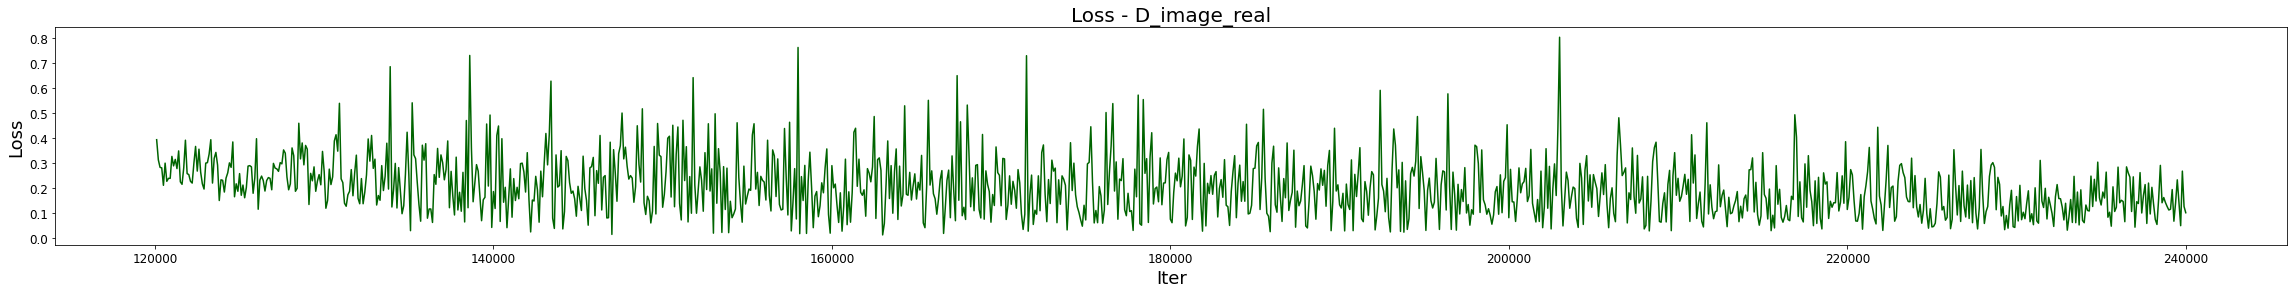

In [8073]:
# Data for plotting
x = log_dict['iters']
if PIX2PIX:
    y = log_dict['D_real']
else:
    y = log_dict['D_image_real']
fig, ax = plt.subplots()
# ax.plot(x, y, 'forestgreen')
ax.plot(x, y, 'darkgreen')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - D_image_real')
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_D_image_real.png")
plt.show()

---
---
## G_L1 loss plot

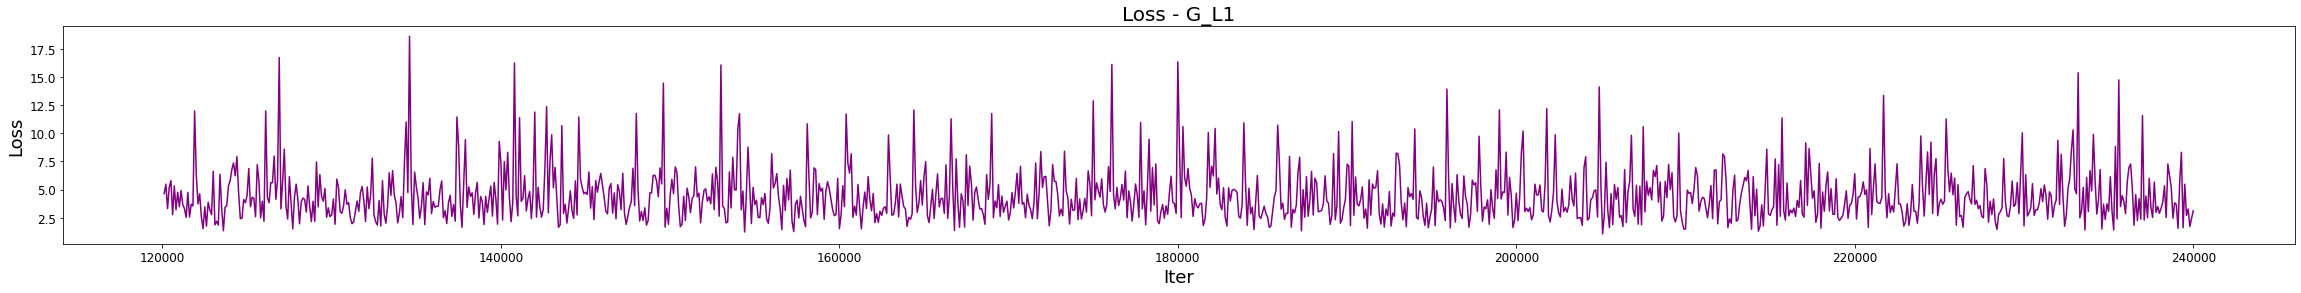

In [8074]:
# Data for plotting
x = log_dict['iters']
y = log_dict['G_L1']
fig, ax = plt.subplots()
ax.plot(x, y, 'purple')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - G_L1')
# plt.ylim(0, 14)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_G_L1.png")
plt.show()

---
---
## G_person loss plot

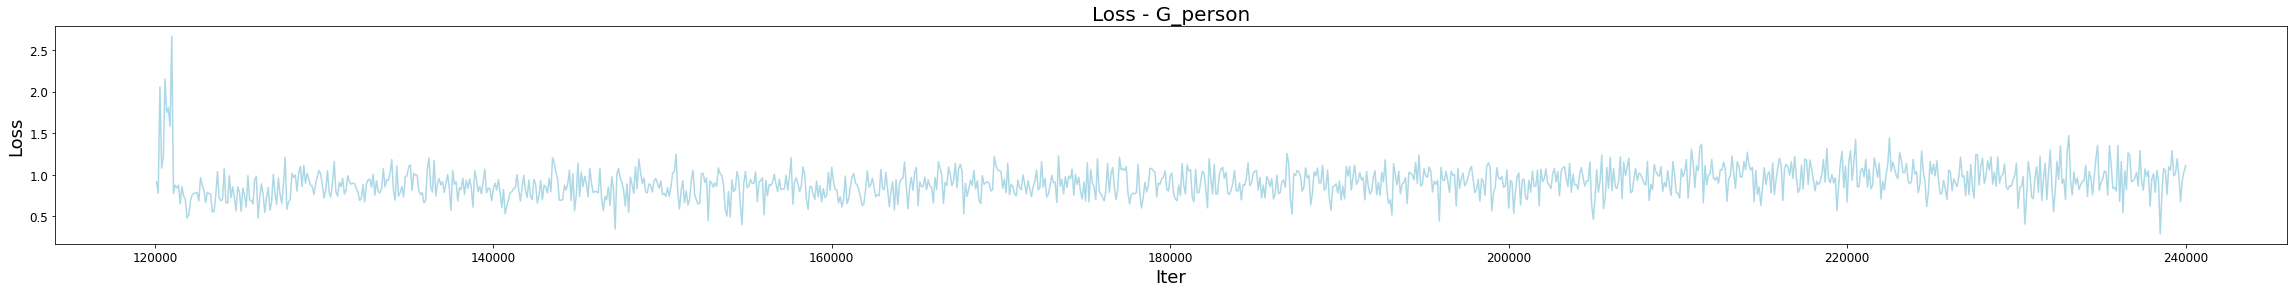

In [8075]:
if not PIX2PIX:
    # Data for plotting
    x = log_dict['iters']
    try:
        y = log_dict['G_person']
    except:
        y = log_dict['G_GAN_person']
    fig, ax = plt.subplots()
    ax.plot(x, y, 'lightblue')

    ax.set(xlabel='Iter', ylabel='Loss',
           title='Loss - G_person')

    # plt.ylim(0, 3)

    if SAVE:
        fig.savefig(log_dir +'/'+ log_dir + "_loss_G_person.png")
    plt.show()

## D_person_fake loss plot

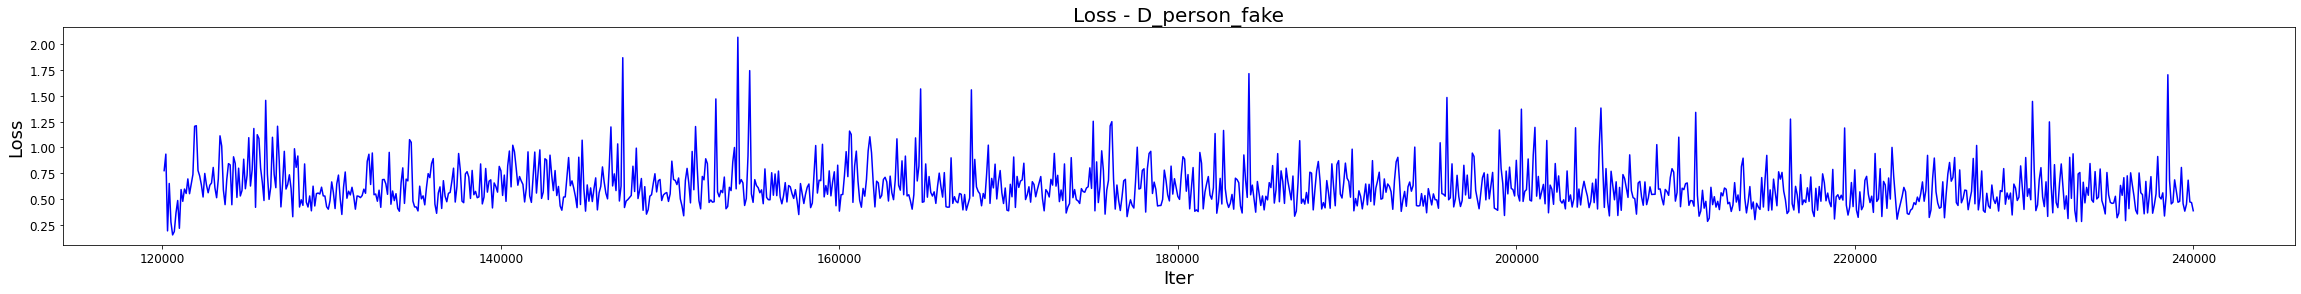

In [8076]:
if not PIX2PIX:
    # Data for plotting
    x = log_dict['iters']
    y = log_dict['D_person_fake']
    # print(x)
    # print(y)
    fig, ax = plt.subplots()
    ax.plot(x, y, 'blue')

    ax.set(xlabel='Iter', ylabel='Loss',
           title='Loss - D_person_fake')
    # plt.ylim(0, 3)

    if SAVE:
        fig.savefig(log_dir +'/'+ log_dir + "_loss_D_person_fake.png")
    plt.show()

## D_person_real plot

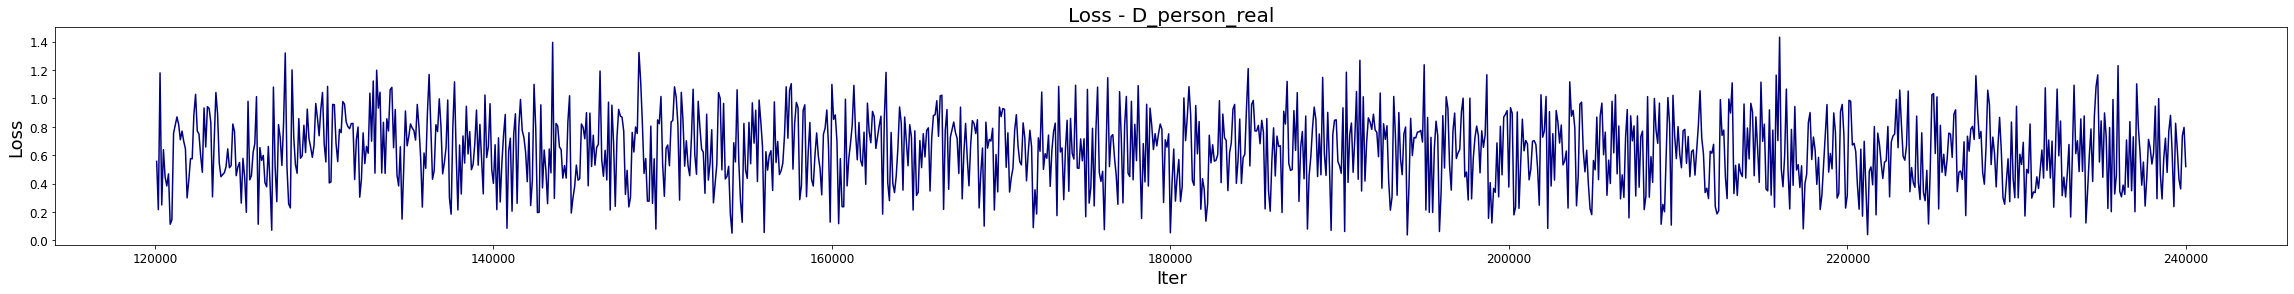

In [8077]:
if not PIX2PIX:
    # Data for plotting
    x = log_dict['iters']
    y = log_dict['D_person_real']
    # print(x)
    # print(y)
    fig, ax = plt.subplots()
    ax.plot(x, y, 'navy')

    ax.set(xlabel='Iter', ylabel='Loss',
           title='Loss - D_person_real')
    # plt.ylim(0, 3.5)

    if SAVE:
        fig.savefig(log_dir +'/'+ log_dir + "_loss_D_person_real.png")
    plt.show()

## Learning Rate

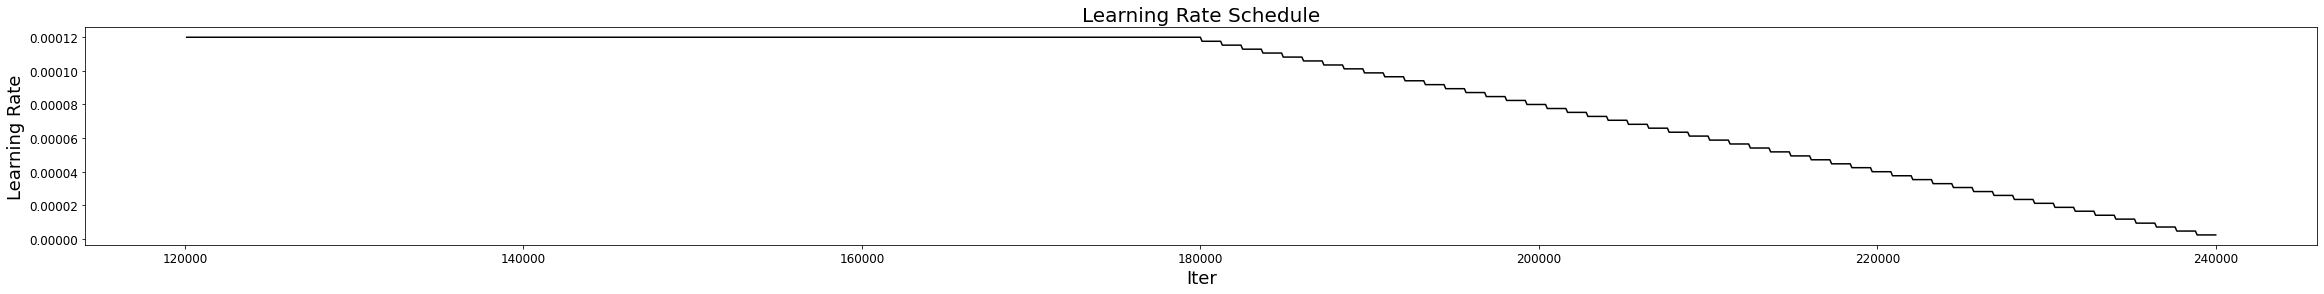

In [8078]:
# Data for plotting
x = log_dict['iters']
y = log_dict['lr']
fig, ax = plt.subplots()
ax.plot(x, y, 'black')

ax.set(xlabel='Iter', ylabel='Learning Rate',
       title='Learning Rate Schedule')
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_learning_rate.png")
plt.show()

---
---
## Accuracy Plot - D Image Fake

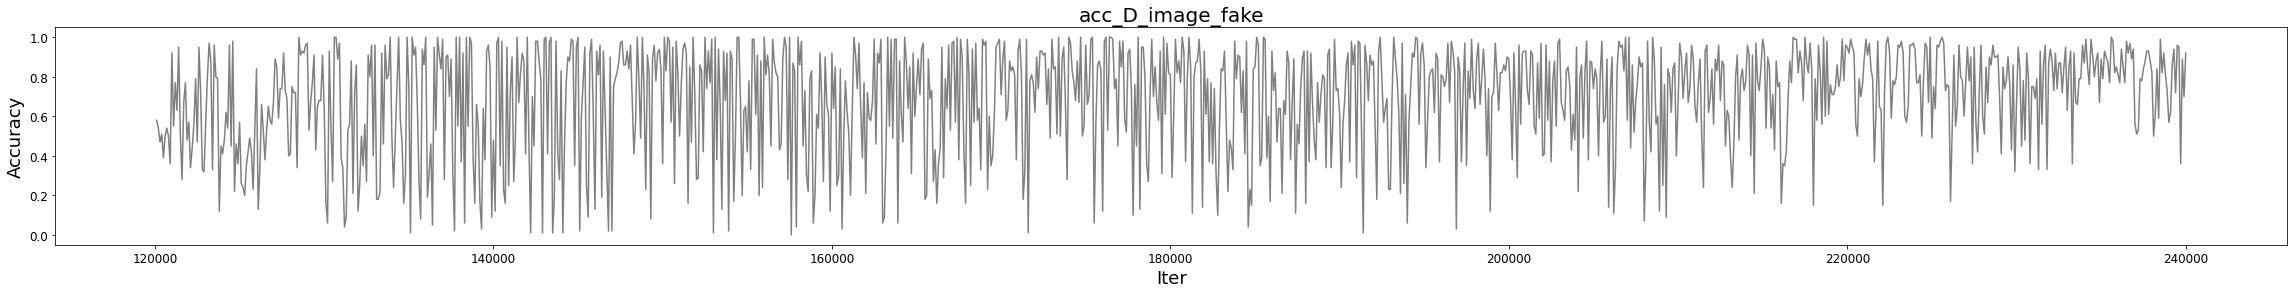

In [8079]:
# Data for plotting
if PIX2PIX:
    data_name = 'acc_D_fake'
else:
    data_name = 'acc_D_image_fake'
x = log_dict['iters']
y = log_dict[data_name]
fig, ax = plt.subplots()
ax.plot(x, y, 'grey')

ax.set(xlabel='Iter', ylabel='Accuracy',
       title=data_name)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_"+data_name+".png")
plt.show()

## Accuracy Plot - D Image Real

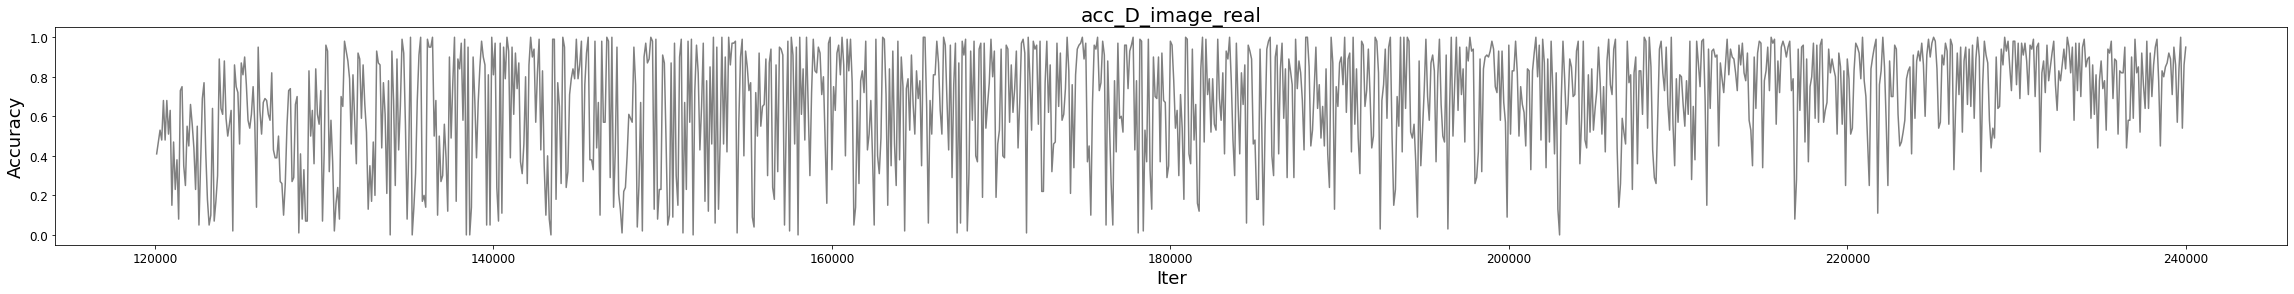

In [8080]:
# Data for plotting
if PIX2PIX:
    data_name = 'acc_D_real'
else:
    data_name = 'acc_D_image_real'
x = log_dict['iters']
y = log_dict[data_name]
fig, ax = plt.subplots()
ax.plot(x, y, 'grey')

ax.set(xlabel='Iter', ylabel='Accuracy',
       title=data_name)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_"+data_name+".png")
plt.show()

## Accuracy Plot - D Person Fake

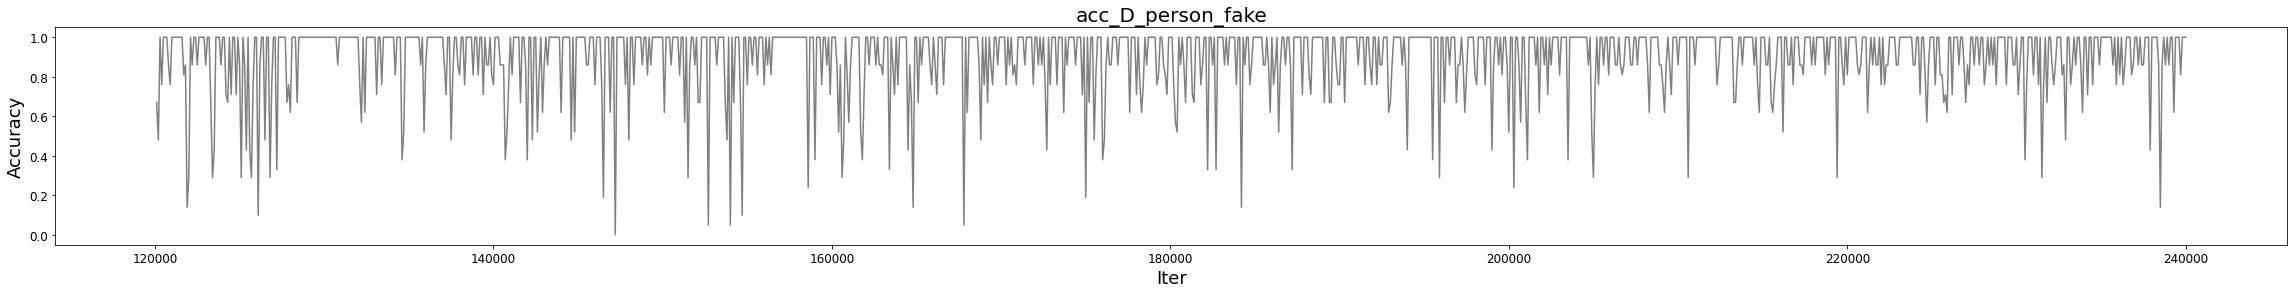

In [8081]:
# Data for plotting
if not PIX2PIX:
    data_name = 'acc_D_person_fake'
    x = log_dict['iters']
    y = log_dict[data_name]
    fig, ax = plt.subplots()
    ax.plot(x, y, 'grey')

    ax.set(xlabel='Iter', ylabel='Accuracy',
           title=data_name)

    if SAVE:
        fig.savefig(log_dir +'/'+ log_dir + "_"+data_name+".png")
    plt.show()

## Accuracy Plot - D Person Real

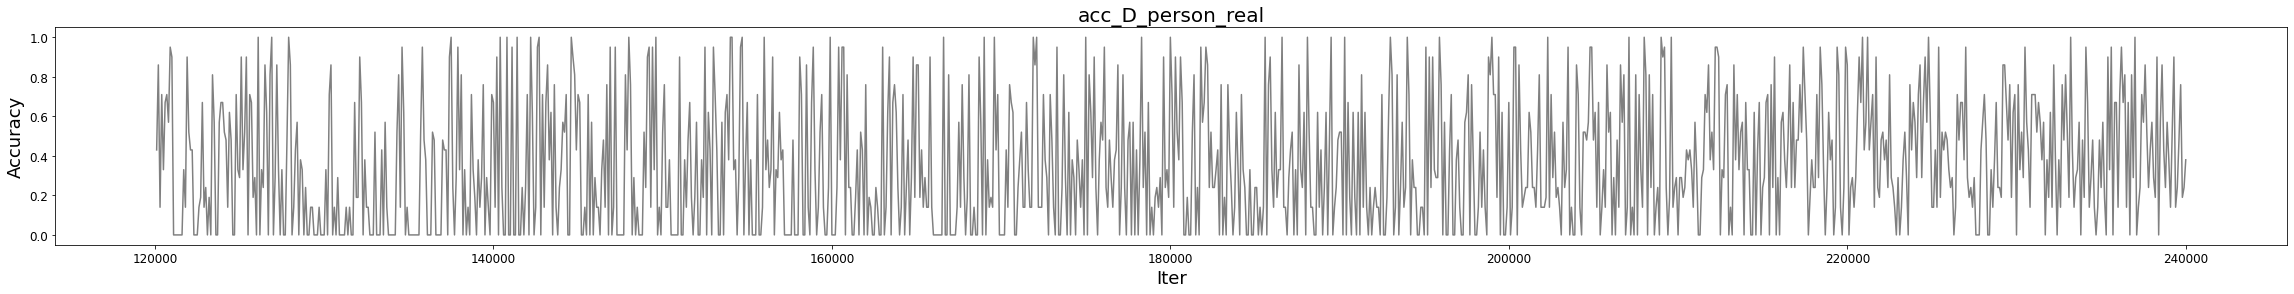

In [8082]:
# Data for plotting
if not PIX2PIX:
    data_name = 'acc_D_person_real'
    x = log_dict['iters']
    y = log_dict[data_name]
    fig, ax = plt.subplots()
    ax.plot(x, y, 'grey')

    ax.set(xlabel='Iter', ylabel='Accuracy',
           title=data_name)

    if SAVE:
        fig.savefig(log_dir +'/'+ log_dir + "_"+data_name+".png")
    plt.show()

---
# Gradient Data

## Gradients -- OUTER layer of generator

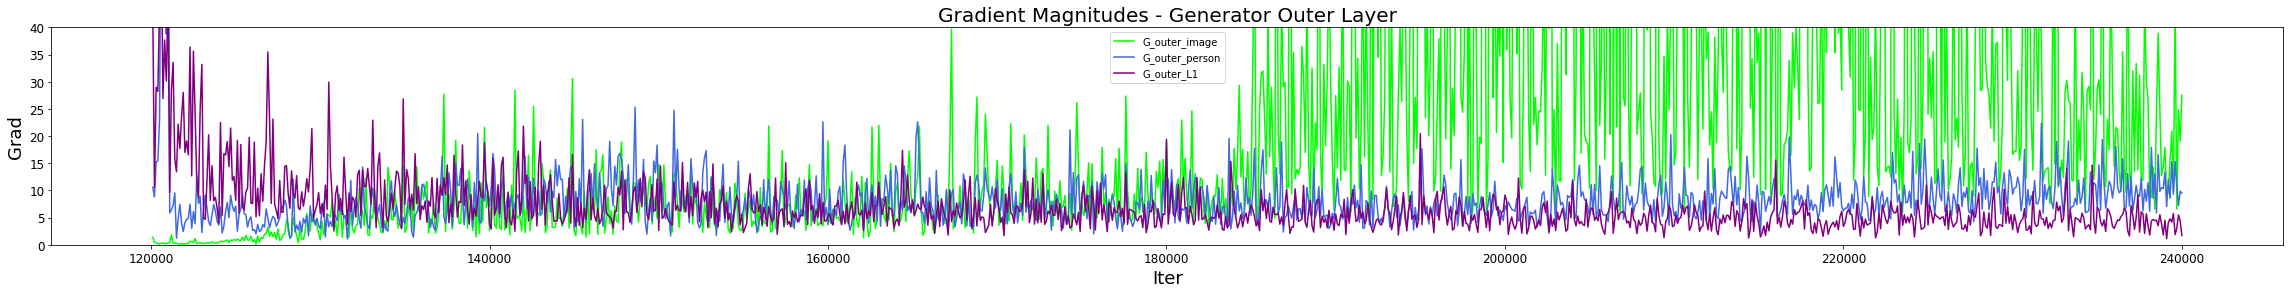

In [8083]:
# Data for plotting
x = log_dict['iters']
# data_name = 'grad_G_image', 'grad_G_person', 'grad_G_L1', 'grad_G', 'grad_G_clip'
y0 = log_dict['grad_G_outer_image']
y1 = log_dict['grad_G_outer_person']
y2 = log_dict['grad_G_outer_L1']

fig, ax = plt.subplots()
ax.plot(x, y0, label = "G_outer_image", color='lime')
ax.plot(x, y1, label = "G_outer_person", color='royalblue')
ax.plot(x, y2, label = "G_outer_L1", color='purple')

ax.set(xlabel='Iter', ylabel='Grad',
       title='Gradient Magnitudes - Generator Outer Layer')
plt.ylim(0,40)
plt.legend()
if SAVE:
    try:
        fig.savefig(log_dir +'/'+ log_dir + "_generator_outer_gradients" + ".png")
    except:
        print('COULD NOT SAVE ...generator_outer_gradients.png')
plt.show()

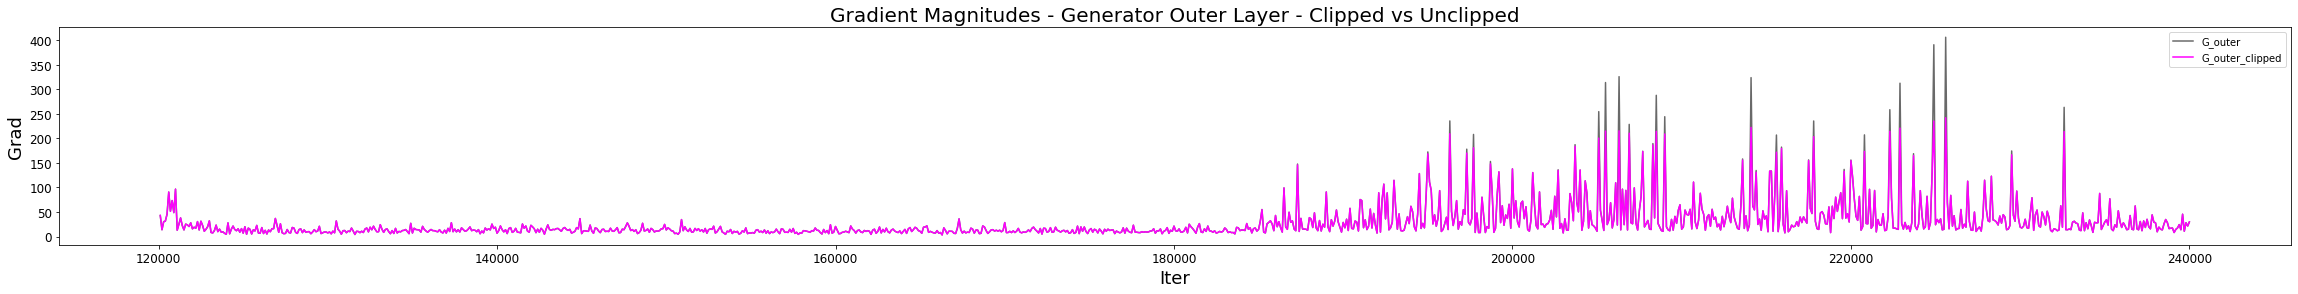

In [8084]:
# Data for plotting
x = log_dict['iters']# data_name = 'grad_G_image', 'grad_G_person', 'grad_G_L1', 'grad_G', 'grad_G_clip'
y0 = log_dict['grad_G_outer']
y1 = log_dict['grad_G_outer_clip']

fig, ax = plt.subplots()
ax.plot(x, y0, label = "G_outer", color='dimgrey')
ax.plot(x, y1, label = "G_outer_clipped", color='magenta')

ax.set(xlabel='Iter', ylabel='Grad',
       title='Gradient Magnitudes - Generator Outer Layer - Clipped vs Unclipped')
# plt.ylim(0, 200)
plt.legend()
if SAVE:
    try:
        fig.savefig(log_dir +'/'+ log_dir + "_generator_outer_gradients_clip" + ".png")
    except:
        print('COULD NOT SAVE ..._generator_outer_gradients_clip.png')
plt.show()

## Gradients -- MIDDLE layer of generator

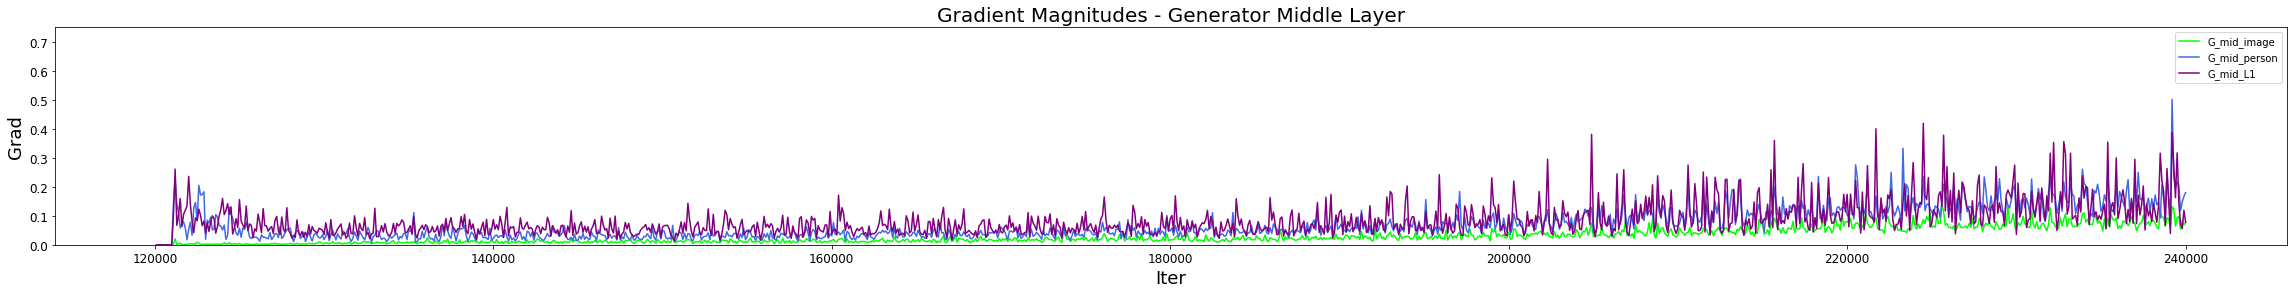

In [8085]:
# Data for plotting
x = log_dict['iters']
# data_name = 'grad_G_image', 'grad_G_person', 'grad_G_L1', 'grad_G', 'grad_G_clip'
y0 = log_dict['grad_G_mid_image']
y1 = log_dict['grad_G_mid_person']
y2 = log_dict['grad_G_mid_L1']

fig, ax = plt.subplots()
ax.plot(x, y0, label = "G_mid_image", color='lime')
ax.plot(x, y1, label = "G_mid_person", color='royalblue')
ax.plot(x, y2, label = "G_mid_L1", color='purple')

ax.set(xlabel='Iter', ylabel='Grad',
       title='Gradient Magnitudes - Generator Middle Layer')
plt.ylim(0, 0.75)
plt.legend()
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_generator_middle_gradients" + ".png")
plt.show()

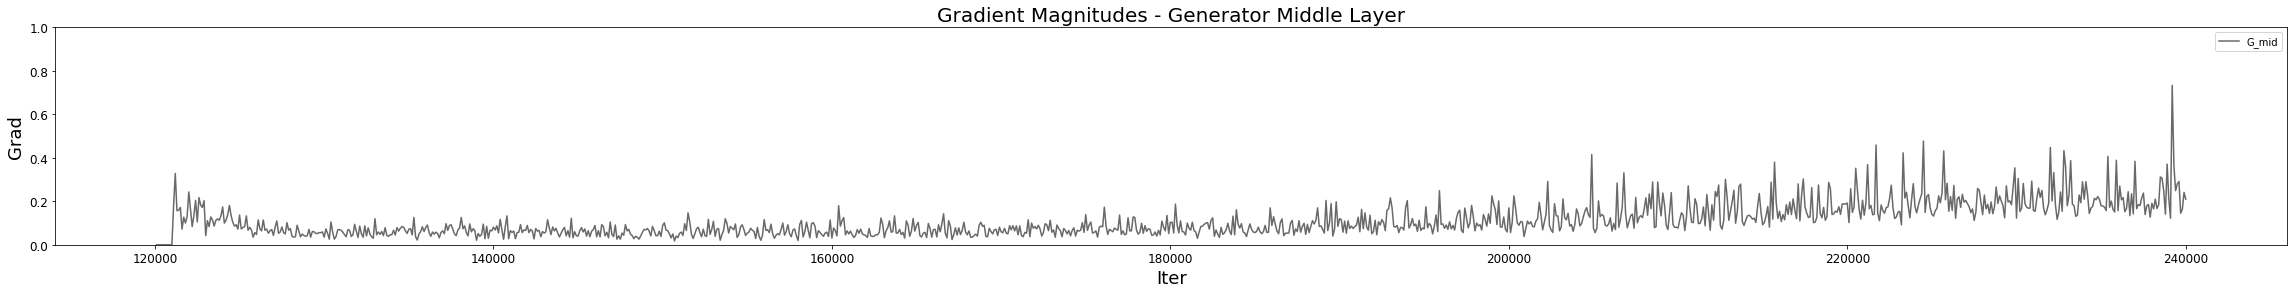

In [8086]:
# Data for plotting
x = log_dict['iters']# data_name = 'grad_G_image', 'grad_G_person', 'grad_G_L1', 'grad_G', 'grad_G_clip'
y0 = log_dict['grad_G_mid']
# y1 = log_dict['grad_G_mid_clip']

fig, ax = plt.subplots()
ax.plot(x, y0, label = "G_mid", color='dimgrey')
# ax.plot(x, y1, label = "G_mid_clipped", color='magenta')

ax.set(xlabel='Iter', ylabel='Grad',
       title='Gradient Magnitudes - Generator Middle Layer')
plt.ylim(0, 1)
plt.legend()
if SAVE:
    try:
        fig.savefig(log_dir +'/'+ log_dir + "_generator_middle_gradients_all" + ".png")
    except:
        print('COULD NOT SAVE ..._generator_middle_gradients_all.png')
plt.show()

## Gradients -- INNER layer of generator

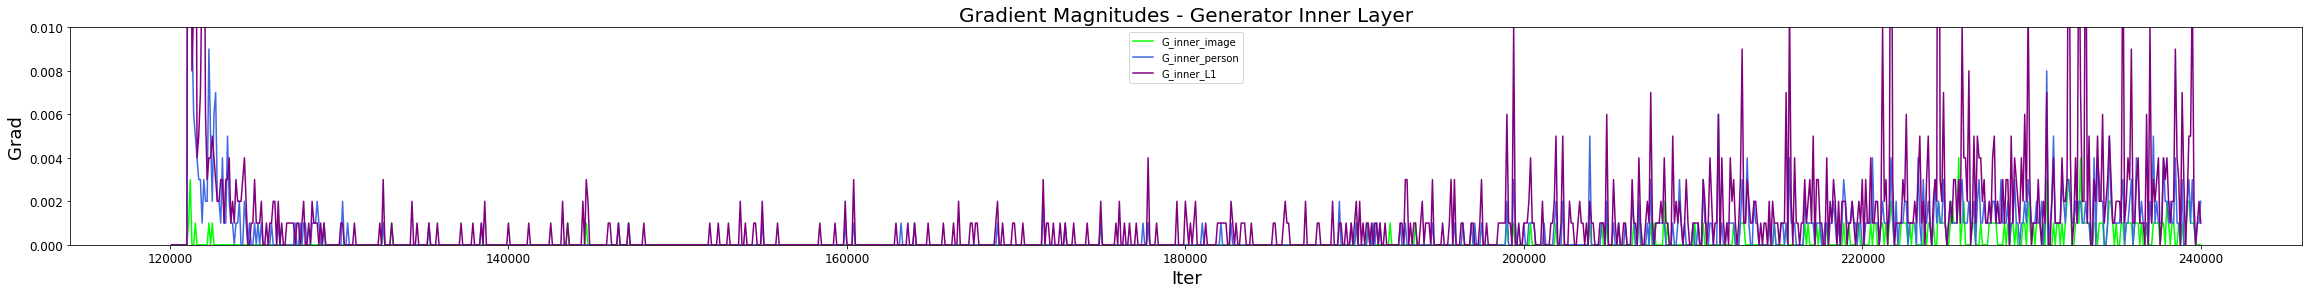

In [8087]:
# Data for plotting
x = log_dict['iters']
# data_name = 'grad_G_image', 'grad_G_person', 'grad_G_L1', 'grad_G', 'grad_G_clip'
y0 = log_dict['grad_G_inner_image']
y1 = log_dict['grad_G_inner_person']
y2 = log_dict['grad_G_inner_L1']

fig, ax = plt.subplots()
ax.plot(x, y0, label = "G_inner_image", color='lime')
ax.plot(x, y1, label = "G_inner_person", color='royalblue')
ax.plot(x, y2, label = "G_inner_L1", color='purple')

ax.set(xlabel='Iter', ylabel='Grad',
       title='Gradient Magnitudes - Generator Inner Layer')
plt.ylim(0, 0.01)
plt.legend()
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_generator_inner_gradients" + ".png")
plt.show()

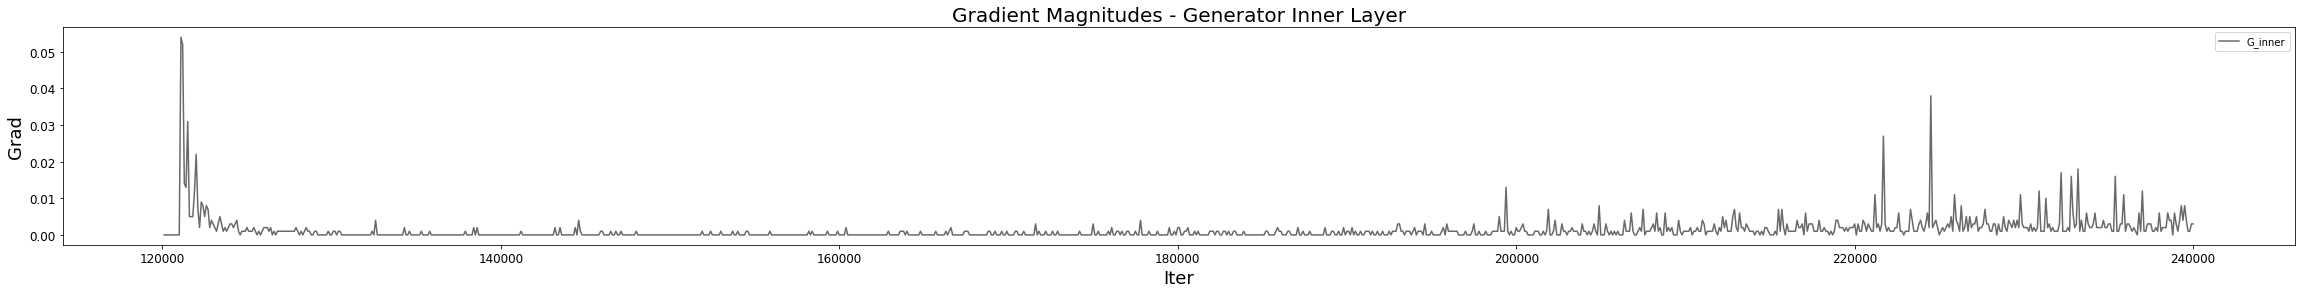

In [8088]:
# Data for plotting
x = log_dict['iters']# data_name = 'grad_G_image', 'grad_G_person', 'grad_G_L1', 'grad_G', 'grad_G_clip'
y0 = log_dict['grad_G_inner']
# y1 = log_dict['grad_G_inner_clip']

fig, ax = plt.subplots()
ax.plot(x, y0, label = "G_inner", color='dimgrey')
# ax.plot(x, y1, label = "G_inner_clipped", color='magenta')

ax.set(xlabel='Iter', ylabel='Grad',
       title='Gradient Magnitudes - Generator Inner Layer')
# plt.ylim(0, 1)
plt.legend()
if SAVE:
    try:
        fig.savefig(log_dir +'/'+ log_dir + "_generator_inner_gradients_all" + ".png")
    except:
        print('COULD NOT SAVE ..._generator_inner_gradients_all.png')
plt.show()

---  
---
# Validation Data

In [8089]:
## Read Log File
try:
    with open('../checkpoints/'+log_dir+'/validation_loss_log.txt', 'r') as f:
        validation_log = f.read()
except:
    with open('../baseline_checkpoints/'+log_dir+'/validation_loss_log.txt', 'r') as f:
        validation_log = f.read()

In [8090]:
# val_llog = validation_log.split('\n')
val_llog = validation_log.split('================')[-1].split('\n')
val_split_llog = [e.replace('(', '').replace(')', '').replace(',', '').split() for e in val_llog]
val_llog[:10]

['',
 '(epoch: 101, iters: 121200, sample: 0, lr: 0.0001200) D_image_real: 0.265 D_image_fake: 0.309 D_person_real: 0.666 D_person_fake: 0.671 acc_D_image_real: 0.370 acc_D_image_fake: 0.620 acc_D_person_real: 0.000 acc_D_person_fake: 1.000 ',
 '(epoch: 101, iters: 121200, sample: 1, lr: 0.0001200) D_image_real: 0.288 D_image_fake: 0.247 D_person_real: 0.847 D_person_fake: 0.610 acc_D_image_real: 0.360 acc_D_image_fake: 0.620 acc_D_person_real: 0.000 acc_D_person_fake: 1.000 ',
 '(epoch: 101, iters: 121200, sample: 2, lr: 0.0001200) D_image_real: 0.196 D_image_fake: 0.405 D_person_real: 0.620 D_person_fake: 0.770 acc_D_image_real: 0.660 acc_D_image_fake: 0.270 acc_D_person_real: 0.000 acc_D_person_fake: 0.860 ',
 '(epoch: 101, iters: 121200, sample: 3, lr: 0.0001200) D_image_real: 0.208 D_image_fake: 0.325 D_person_real: 1.559 D_person_fake: 0.627 acc_D_image_real: 0.630 acc_D_image_fake: 0.440 acc_D_person_real: 0.000 acc_D_person_fake: 1.000 ',
 '(epoch: 101, iters: 121200, sample: 4

In [8091]:
# Create list of keys from validation log data
val_keys = [k.replace(':','') for k in val_split_llog[1] if ':' in k]
print('logged data:')
print(val_keys)

standard_keys = ['epoch', 'iters','lr']

# Create empty dict for log data
# val_log_dict = {k:[] for k in val_keys}
# val_log_dict = {k:[[],[],[],[],[]] for k in val_keys}
# val_log_dict = {k:([] if k in standard_keys else [[],[],[],[],[]]) for k in val_keys}
val_log_dict = {k:(set() if k in standard_keys else [[],[],[],[],[]]) for k in val_keys}
val_log_dict['i'] = []


# Populate log dict
count = 0
for entry in val_split_llog:
#     print(entry)
    if entry and entry[0] == 'epoch:' and count < MAX_ITER:
        val_log_dict['i'].append(count)
        count += 1
        key = ''
        next_sample = False  ## if next data indicates which image sample
        standard_key = False
        for e in entry:
            if e[:-1] in val_keys:
                key = e[:-1]
                if key == 'sample':
                    next_sample = True
                else:
                    next_sample = False
                if key in standard_keys:
                    standard_key = True
                else:
                    standard_key = False
            else:
                data = float(e) if '.' in e else int(e)    
                if next_sample == True:
                    img_sample = data
                if standard_key == True:
                    val_log_dict[key].add(data)
                else:
                    val_log_dict[key][img_sample].append(data)

# print()
# print(val_log_dict.keys())

logged data:
['epoch', 'iters', 'sample', 'lr', 'D_image_real', 'D_image_fake', 'D_person_real', 'D_person_fake', 'acc_D_image_real', 'acc_D_image_fake', 'acc_D_person_real', 'acc_D_person_fake']


## D_image_fake loss plot - VALIDATION

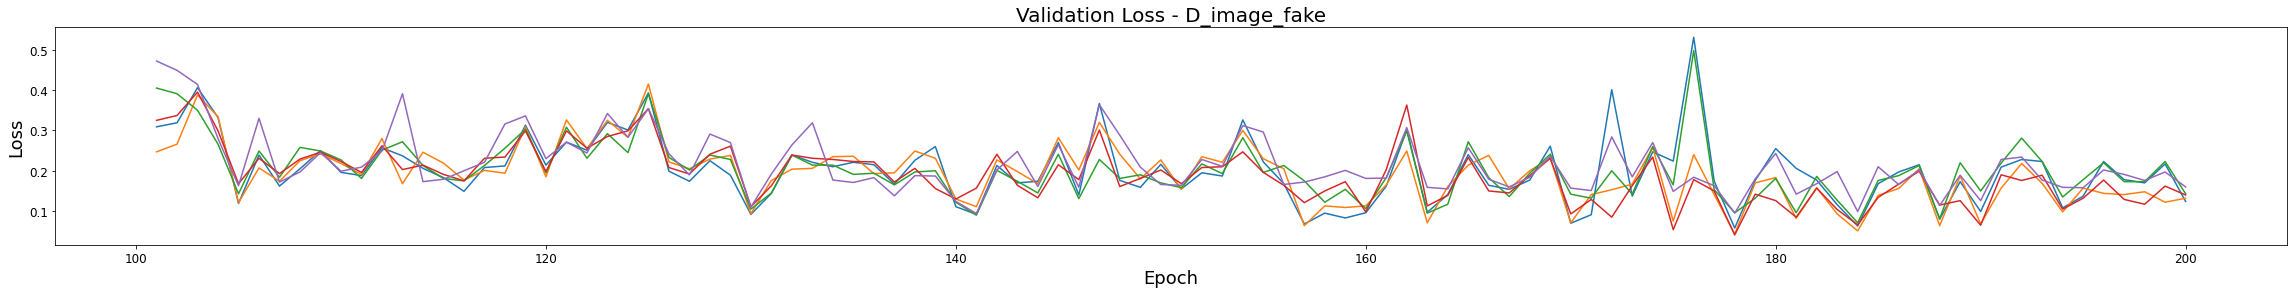

In [8092]:
# Data for plotting
x = sorted(val_log_dict['epoch'])
data_name = 'D_image_fake'
y0 = val_log_dict[data_name][0]
y1 = val_log_dict[data_name][1]
y2 = val_log_dict[data_name][2]
y3 = val_log_dict[data_name][3]
y4 = val_log_dict[data_name][4]

fig, ax = plt.subplots()
ax.plot(x, y0, label = "img0")
ax.plot(x, y1, label = "img1")
ax.plot(x, y2, label = "img2")
ax.plot(x, y3, label = "img3")
ax.plot(x, y4, label = "img4")

ax.set(xlabel='Epoch', ylabel='Loss',
       title='Validation Loss - ' + data_name)
# plt.ylim(0, 2)
if SAVE:
    try:
        fig.savefig(log_dir +'/'+ log_dir + "_validation_loss_" + data_name + ".png")
    except:
        print('COULD NOT SAVE IMG')
plt.show()

## D_image_real loss plot - VALIDATION

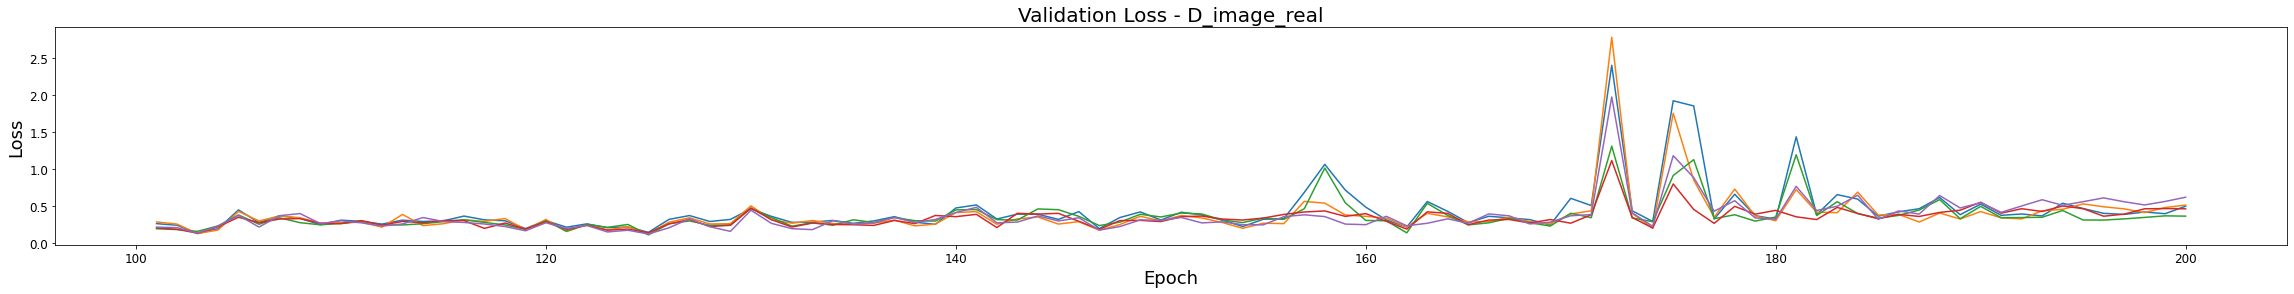

In [8093]:
# Data for plotting
x = sorted(val_log_dict['epoch'])
data_name = 'D_image_real'
y0 = val_log_dict[data_name][0]
y1 = val_log_dict[data_name][1]
y2 = val_log_dict[data_name][2]
y3 = val_log_dict[data_name][3]
y4 = val_log_dict[data_name][4]

fig, ax = plt.subplots()
ax.plot(x, y0, label = "img0")
ax.plot(x, y1, label = "img1")
ax.plot(x, y2, label = "img2")
ax.plot(x, y3, label = "img3")
ax.plot(x, y4, label = "img4")

ax.set(xlabel='Epoch', ylabel='Loss',
       title='Validation Loss - ' + data_name)
# plt.ylim(0, 2)
if SAVE:
    try:
        fig.savefig(log_dir +'/'+ log_dir + "_validation_loss_" + data_name + ".png")
    except:
        print('COULD NOT SAVE IMG')
plt.show()

## D_person_fake loss plot  - VALIDATION

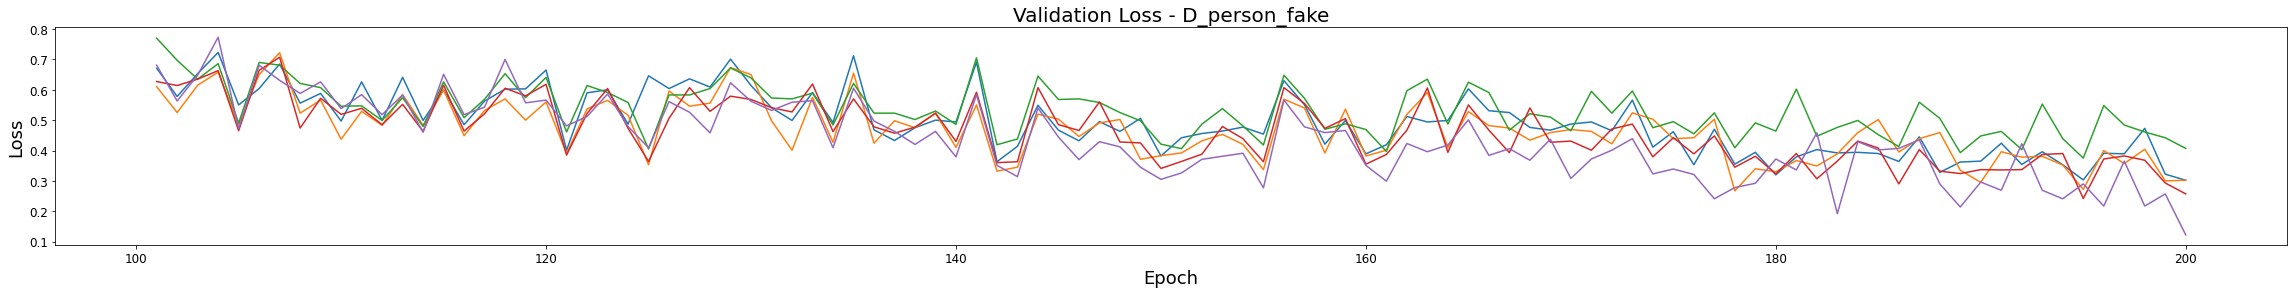

In [8094]:
# Data for plotting
x = sorted(val_log_dict['epoch'])
data_name = 'D_person_fake'
y0 = val_log_dict[data_name][0]
y1 = val_log_dict[data_name][1]
y2 = val_log_dict[data_name][2]
y3 = val_log_dict[data_name][3]
y4 = val_log_dict[data_name][4]

fig, ax = plt.subplots()
ax.plot(x, y0, label = "img0")
ax.plot(x, y1, label = "img1")
ax.plot(x, y2, label = "img2")
ax.plot(x, y3, label = "img3")
ax.plot(x, y4, label = "img4")

ax.set(xlabel='Epoch', ylabel='Loss',
       title='Validation Loss - ' + data_name)
# plt.ylim(0, 2)
if SAVE:
    try:
        fig.savefig(log_dir +'/'+ log_dir + "_validation_loss_" + data_name + ".png")
    except:
        print('COULD NOT SAVE IMG')
plt.show()

## D_person_real loss plot - VALIDATION

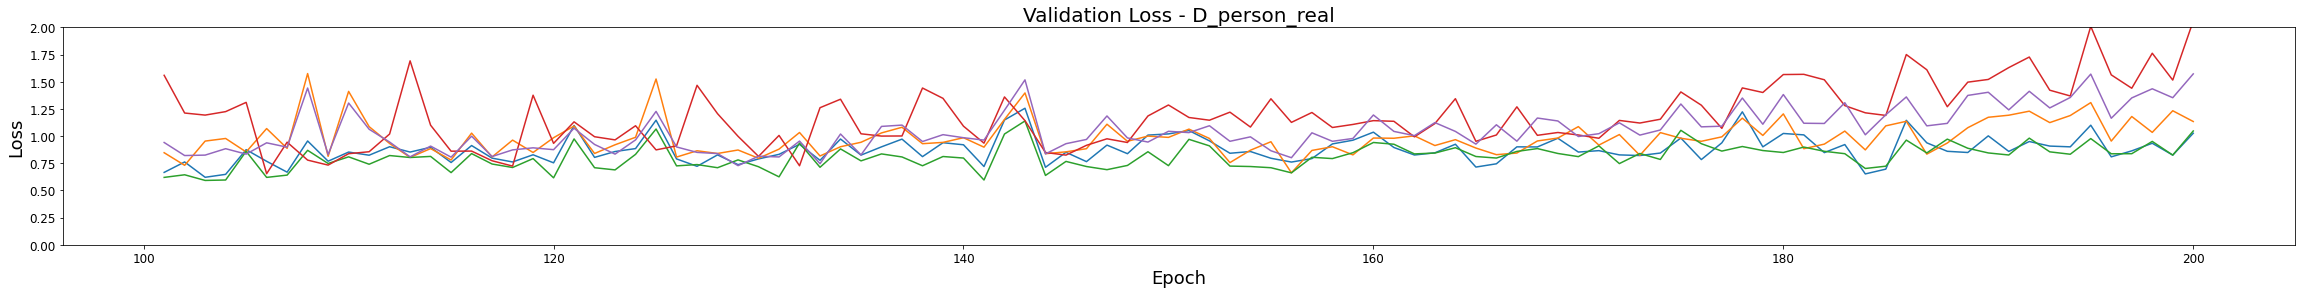

In [8095]:
# Data for plotting
x = sorted(val_log_dict['epoch'])
data_name = 'D_person_real'
y0 = val_log_dict[data_name][0]
y1 = val_log_dict[data_name][1]
y2 = val_log_dict[data_name][2]
y3 = val_log_dict[data_name][3]
y4 = val_log_dict[data_name][4]

fig, ax = plt.subplots()
ax.plot(x, y0, label = "img0")
ax.plot(x, y1, label = "img1")
ax.plot(x, y2, label = "img2")
ax.plot(x, y3, label = "img3")
ax.plot(x, y4, label = "img4")

ax.set(xlabel='Epoch', ylabel='Loss',
       title='Validation Loss - ' + data_name)
plt.ylim(0, 2)
if SAVE:
    try:
        fig.savefig(log_dir +'/'+ log_dir + "_validation_loss_" + data_name + ".png")
    except:
        print('COULD NOT SAVE IMG')
plt.show()

---
---
## Accuracy Plot - D Image Fake - VALIDATION

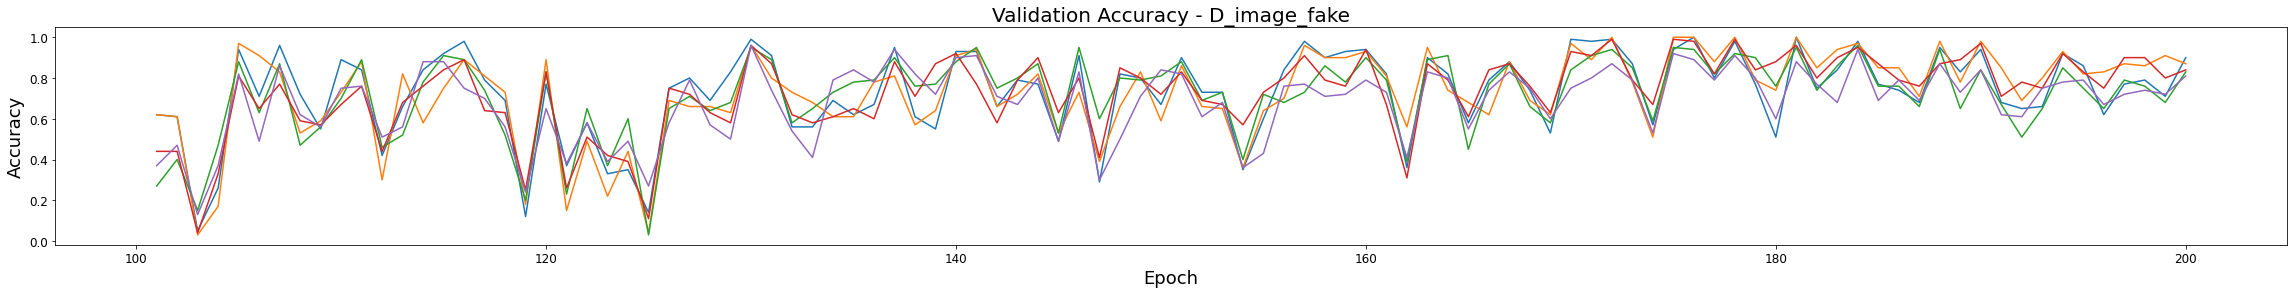

In [8096]:
# Data for plotting
x = sorted(val_log_dict['epoch'])
data_name = 'acc_D_image_fake'
y0 = val_log_dict[data_name][0]
y1 = val_log_dict[data_name][1]
y2 = val_log_dict[data_name][2]
y3 = val_log_dict[data_name][3]
y4 = val_log_dict[data_name][4]

fig, ax = plt.subplots()
ax.plot(x, y0, label = "img0")
ax.plot(x, y1, label = "img1")
ax.plot(x, y2, label = "img2")
ax.plot(x, y3, label = "img3")
ax.plot(x, y4, label = "img4")

ax.set(xlabel='Epoch', ylabel='Accuracy',
       title='Validation Accuracy - ' + data_name[4:])
# plt.ylim(0, 2)
if SAVE:
    try:
        fig.savefig(log_dir +'/'+ log_dir + "_validation_" + data_name + ".png")
    except:
        print('COULD NOT SAVE IMG')
plt.show()

## Accuracy Plot - D Image Real - VALIDATION

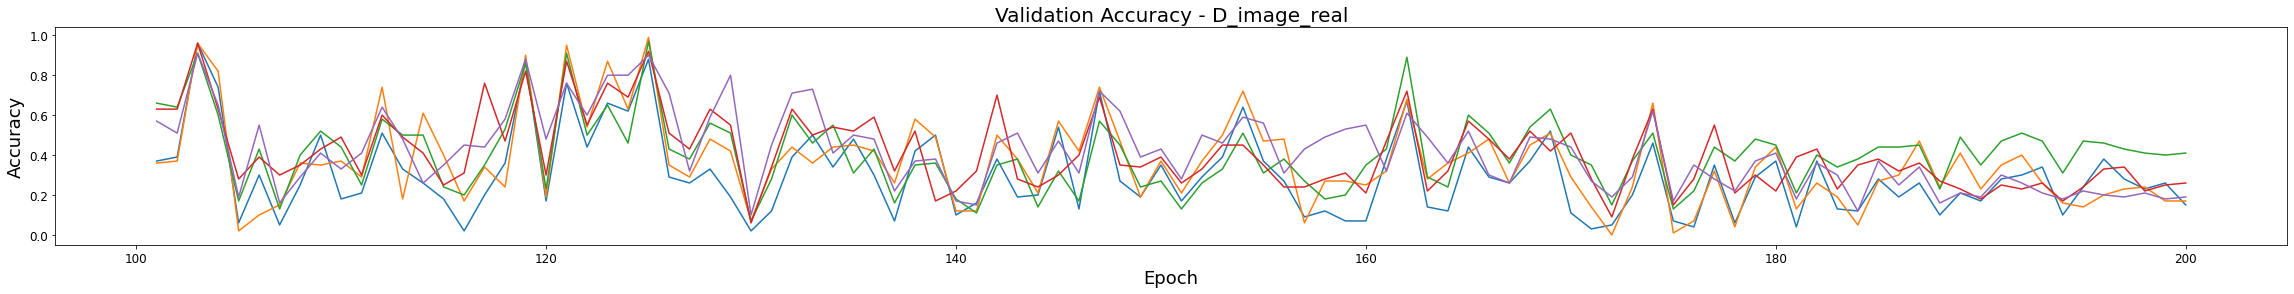

In [8097]:
# Data for plotting
x = sorted(val_log_dict['epoch'])
data_name = 'acc_D_image_real'
y0 = val_log_dict[data_name][0]
y1 = val_log_dict[data_name][1]
y2 = val_log_dict[data_name][2]
y3 = val_log_dict[data_name][3]
y4 = val_log_dict[data_name][4]

fig, ax = plt.subplots()
ax.plot(x, y0, label = "img0")
ax.plot(x, y1, label = "img1")
ax.plot(x, y2, label = "img2")
ax.plot(x, y3, label = "img3")
ax.plot(x, y4, label = "img4")

ax.set(xlabel='Epoch', ylabel='Accuracy',
       title='Validation Accuracy - ' + data_name[4:])
# plt.ylim(0, 2)
if SAVE:
    try:
        fig.savefig(log_dir +'/'+ log_dir + "_validation_" + data_name + ".png")
    except:
        print('COULD NOT SAVE IMG')
plt.show()

## Accuracy Plot - D Person Fake - VALIDATION

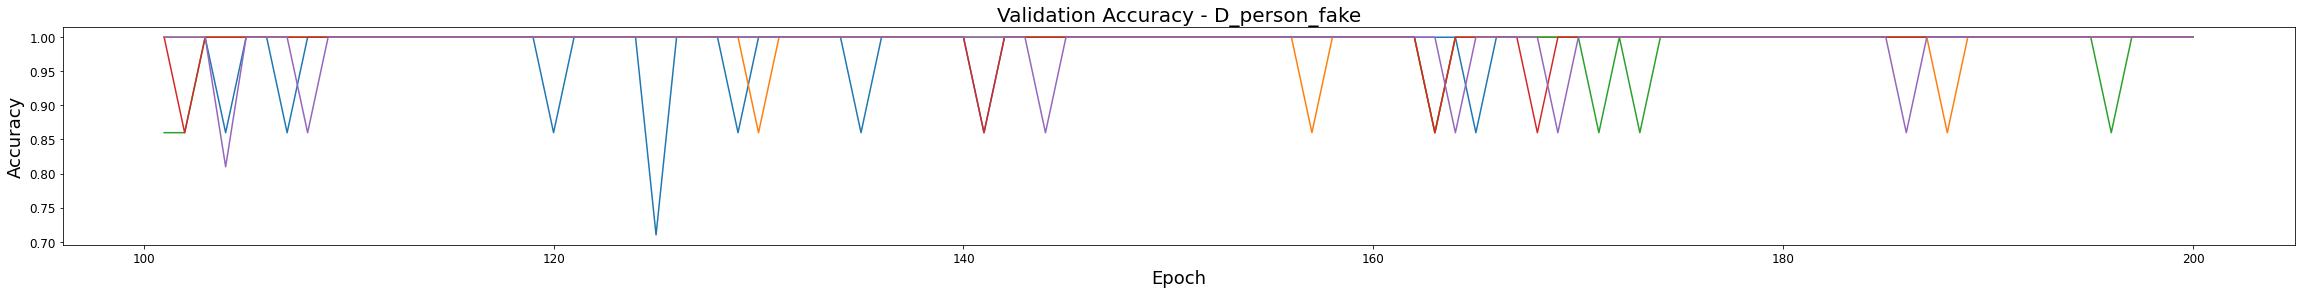

In [8098]:
# Data for plotting
x = sorted(val_log_dict['epoch'])
data_name = 'acc_D_person_fake'
y0 = val_log_dict[data_name][0]
y1 = val_log_dict[data_name][1]
y2 = val_log_dict[data_name][2]
y3 = val_log_dict[data_name][3]
y4 = val_log_dict[data_name][4]

fig, ax = plt.subplots()
ax.plot(x, y0, label = "img0")
ax.plot(x, y1, label = "img1")
ax.plot(x, y2, label = "img2")
ax.plot(x, y3, label = "img3")
ax.plot(x, y4, label = "img4")

ax.set(xlabel='Epoch', ylabel='Accuracy',
       title='Validation Accuracy - ' + data_name[4:])
# plt.ylim(0, 2)
if SAVE:
    try:
        fig.savefig(log_dir +'/'+ log_dir + "_validation_" + data_name + ".png")
    except:
        print('COULD NOT SAVE IMG')
plt.show()

## Accuracy Plot - D Person Real - VALIDATION

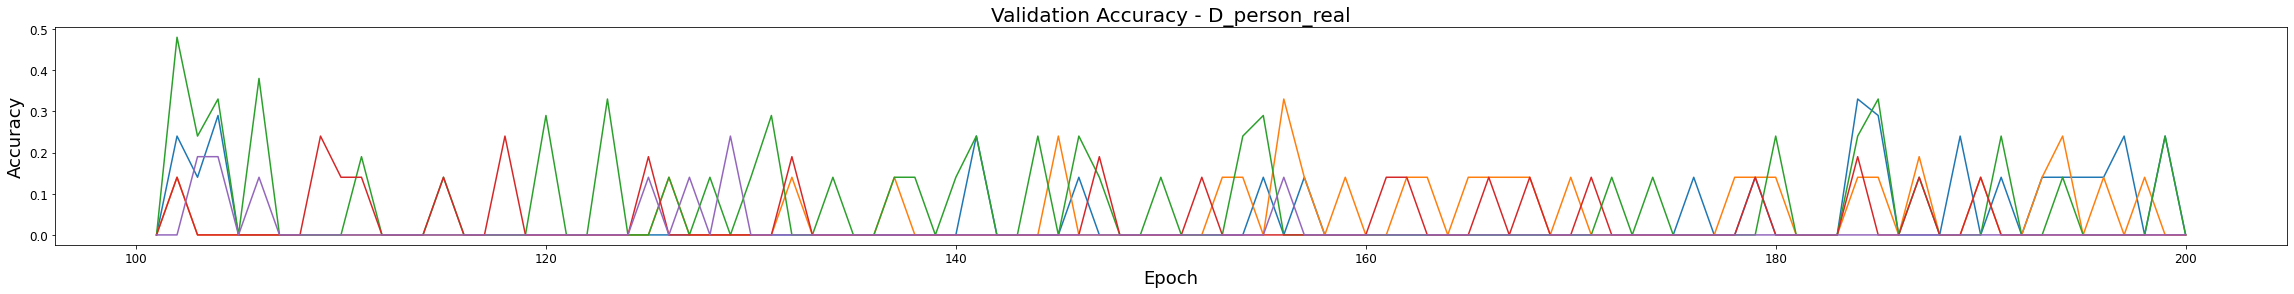

In [8099]:
# Data for plotting
x = sorted(val_log_dict['epoch'])
data_name = 'acc_D_person_real'
y0 = val_log_dict[data_name][0]
y1 = val_log_dict[data_name][1]
y2 = val_log_dict[data_name][2]
y3 = val_log_dict[data_name][3]
y4 = val_log_dict[data_name][4]

fig, ax = plt.subplots()
ax.plot(x, y0, label = "img0")
ax.plot(x, y1, label = "img1")
ax.plot(x, y2, label = "img2")
ax.plot(x, y3, label = "img3")
ax.plot(x, y4, label = "img4")

ax.set(xlabel='Epoch', ylabel='Accuracy',
       title='Validation Accuracy - ' + data_name[4:])
# plt.ylim(0, 2)
if SAVE:
    try:
        fig.savefig(log_dir +'/'+ log_dir + "_validation_" + data_name + ".png")
    except:
        print('COULD NOT SAVE IMG')
plt.show()

----

## Fidelity Metrics - Validation Data during Training

In [8100]:
## Read Log File
try:
    with open('../checkpoints/'+log_dir+'/val/fidelity_log.txt', 'r') as f:
        vfid_log = f.read()
except:
    with open('../baseline_checkpoints/'+log_dir+'/val/fidelity_log.txt', 'r') as f:
        vfid_log = f.read()
# print(vfid_log)

vfid_log = vfid_log.split('\n')
vfid_log = [e.replace(': ', ':').replace(', ', ' ').split() for e in vfid_log]


vfid_keys = ['epoch', 'iters', 'frechet_inception_distance', 'inception_score_mean', 'inception_score_std']
vfid_dict = {k:[] for k in vfid_keys}

for entry in vfid_log:
    for metric in entry:
        key, val = metric.split(':')
        if key in ['epoch', 'iters']:
            vfid_dict[key].append(int(val))
        else:
            vfid_dict[key].append(float(val))
            
# vfid_dict

## Best FID Epoch (for validation set during training)

In [8101]:
best_fid_indx = np.argmin(vfid_dict['frechet_inception_distance'])
best_fid_epoch = vfid_dict['epoch'][best_fid_indx]

best_fid_indx_stage_one = np.argmin(vfid_dict['frechet_inception_distance'][:100])
best_fid_epoch_stage_one = vfid_dict['epoch'][best_fid_indx_stage_one]


print('Training validation set')
print()
print('best stage one epoch', best_fid_epoch_stage_one)
print('best stage one fid:', vfid_dict['frechet_inception_distance'][best_fid_indx_stage_one])
print()
print('best epoch', best_fid_epoch)
print('best fid:', vfid_dict['frechet_inception_distance'][best_fid_indx])
print()
print('last epoch:', vfid_dict['epoch'][-1])
print('latest fid:', vfid_dict['frechet_inception_distance'][-1])

Training validation set

best stage one epoch 98
best stage one fid: 66.1562

best epoch 176
best fid: 55.9595

last epoch: 200
latest fid: 58.7085


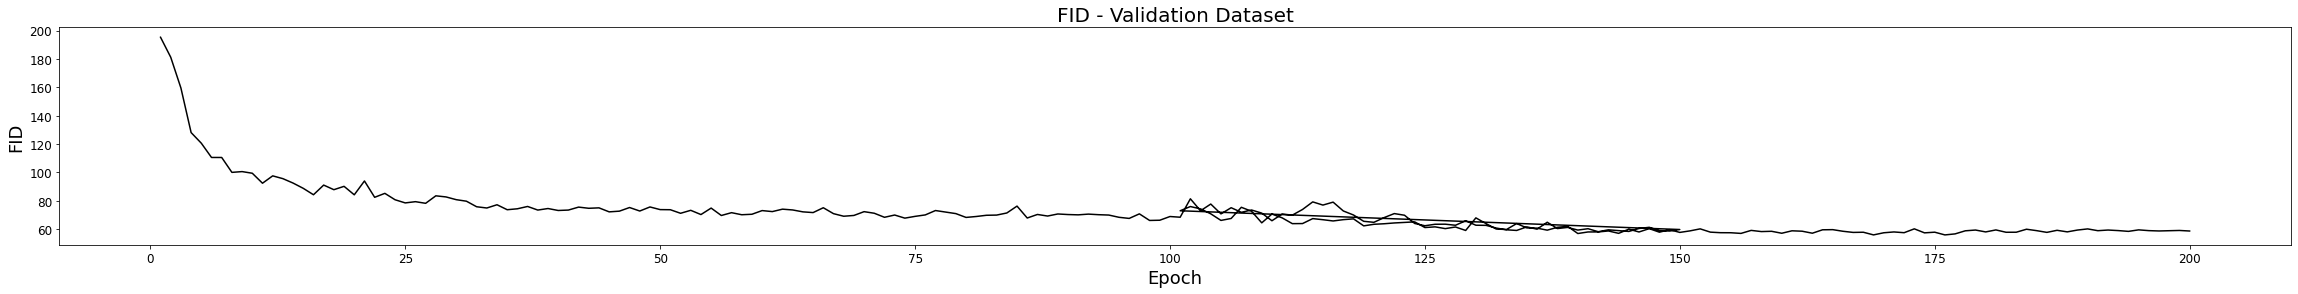

In [8102]:
# Data for plotting
x = vfid_dict['epoch']
y = vfid_dict['frechet_inception_distance']
fig, ax = plt.subplots()
ax.plot(x, y, 'black')

ax.set(xlabel='Epoch', ylabel='FID',
       title='FID - Validation Dataset')
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_validation_fid.png")
plt.show()

#### All metrics -  validation data final epoch 

In [8103]:
print('Validation Dataset - Fidelity Metrics (final epoch)')
print()
for key in vfid_keys:
    print(key, ':', vfid_dict[key][-1])

Validation Dataset - Fidelity Metrics (final epoch)

epoch : 200
iters : 240000
frechet_inception_distance : 58.7085
inception_score_mean : 2.3218
inception_score_std : 0.2458


---
## Fidelity Metrics - Validation Data during Testing - 'Best' saved model

In [8104]:
## Read Log File
try:
    with open('../results/'+log_dir+'/val_best/fidelity_log.txt', 'r') as f:
        tfid_log = f.read()
except:
    raise

tfid_log = tfid_log.split('\n ')
tfid_log = [e.replace(': ', ':').replace(', ', ' ').split() for e in tfid_log][0]

print("Validation Dataset (during testing with 'best' model) - Fidelity Metrics")
print()
for metric in tfid_log:
    print(metric.replace(':', ': '))

Validation Dataset (during testing with 'best' model) - Fidelity Metrics

epoch: best
inception_score_mean: 2.3538
inception_score_std: 0.2735
frechet_inception_distance: 56.7681


## Fidelity Metrics - Validation Data during Testing

In [8105]:
## Read Log File
try:
    with open('../results/'+log_dir+'/val_latest/fidelity_log.txt', 'r') as f:
        tfid_log = f.read()
except:
    with open('../baseline_results/'+log_dir+'/val_latest/fidelity_log.txt', 'r') as f:
        tfid_log = f.read()

tfid_log = tfid_log.split('\n ')
tfid_log = [e.replace(': ', ':').replace(', ', ' ').split() for e in tfid_log][0]

print('Validation Dataset (during testing) - Fidelity Metrics')
print()
for metric in tfid_log:
    print(metric.replace(':', ': '))

Validation Dataset (during testing) - Fidelity Metrics

epoch: latest
inception_score_mean: 2.3574
inception_score_std: 0.2842
frechet_inception_distance: 58.8260


## Fidelity Metrics - Test Data

In [8106]:
## Read Log File
try:
    with open('../results/'+log_dir+'/test_latest/fidelity_log.txt', 'r') as f:
        tfid_log = f.read()
except:
    with open('../baseline_results/'+log_dir+'/test_latest/fidelity_log.txt', 'r') as f:
        tfid_log = f.read()

tfid_log = tfid_log.split('\n ')
tfid_log = [e.replace(': ', ':').replace(', ', ' ').split() for e in tfid_log][0]

print('Test Dataset - Fidelity Metrics')
print()
for metric in tfid_log:
    print(metric.replace(':', ': '))

FileNotFoundError: [Errno 2] No such file or directory: '../baseline_results/exp_progan_128_256_train_cont101_50_50_bs1_w40final_cropcontrast_greybbox_Gmask12_noisedecoder_sppV_sppV_img128L_imgL_lambdaL80L80_LR12_CV10_pretrain1000_seed12/test_latest/fidelity_log.txt'